In [10]:
# importing the dependancies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


## Dataset Summary

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

- `N` - ratio of Nitrogen content in soil
- `P` - ratio of Phosphorous content in soil
- `K` - ratio of Potassium content in soil
- `temperature` - temperature in degree Celsius
- `humidity` - relative humidity in %
- `ph` - ph value of the soil
- `rainfall` - rainfall in mm

In [11]:
FILE_PATH = "/config/workspace/crop-recommendation-dataset/Crop_recommendation.csv"

df = pd.read_csv(FILE_PATH)

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (2200, 8)


In [13]:
# checking for the null values in the dataset 
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


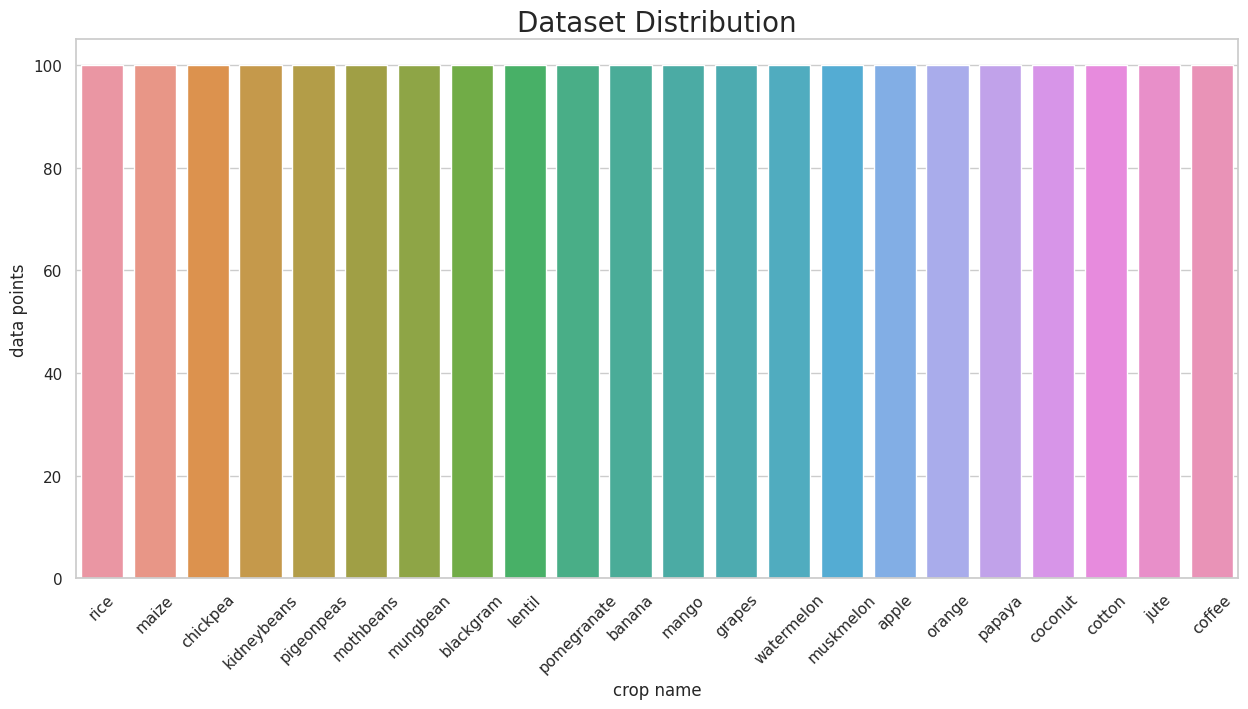

In [15]:
sns.set(style = "whitegrid")
plt.figure(figsize = (15,7))

ax = sns.countplot(data = df, x= 'label')

ax.set(xlabel='crop name')
plt.xticks(rotation = 45)

ax.set(ylabel = 'data points')

plt.title("Dataset Distribution", fontsize = 20)
plt.show()

<Axes: >

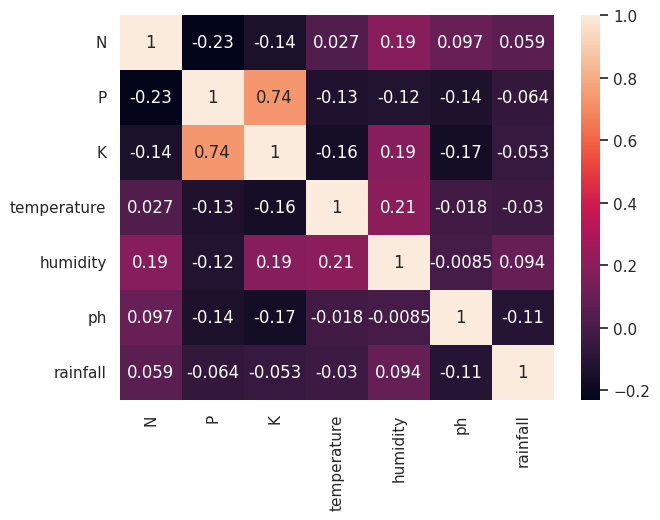

In [16]:
corr_matrix = df._get_numeric_data().corr()

plt.figure(figsize=(7, 5))

sns.heatmap(corr_matrix, annot=True)

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of the train data: {X_train.shape}")
print(f"Shape of the test data: {X_test.shape}")

Shape of the train data: (1760, 7)
Shape of the test data: (440, 7)


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_transformed = le.fit_transform(y_train)
y_test_transformed = le.transform(y_test)

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted, average='weighted')
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    
    return acc, f1, precision, recall

In [20]:
# create a function which can evaluate models and returns a report 
def evaluate_model(X_train, X_test, y_train, y_test, models):
    '''
    This function takes X_train, X_test, y_train, y_test  and models dictionary as input
    Iterate through the given model directory and evaluate metrics

    Returns:
    DataFrame which contains report of all models metrics 
    '''

    model_list = []
    metric_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performances
        model_train_accuracy, model_train_f1, model_train_precision, \
            model_train_recall = evaluate_clf(y_train, y_train_pred)

        # Test set peformances 
        model_test_accuracy, model_test_f1, model_test_precision, \
            model_test_recall = evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        result_dict ={'model_name':list(models.keys())[i], 
                    "train_accuracy": model_train_accuracy, "test_accuracy": model_test_accuracy,
                    "train_precision": model_train_precision, "test_precision": model_test_precision,
                    'train_recall': model_train_recall, "test_recall":model_test_recall,
                    "train_f1_score": model_train_f1, "test_f1_score": model_test_f1}

        metric_list.append(result_dict)

    
    return metric_list


In [21]:
# Model Dictionary
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [ ]:
resultant_metrics = evaluate_model(X_train, X_test, y_train_transformed, y_test_transformed, models)

resultant_metrics_df = pd.DataFrame(data=resultant_metrics)

In [23]:
resultant_metrics_df = resultant_metrics_df.sort_values(by='test_f1_score', ascending=False)
resultant_metrics_df

,model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1_score,test_f1_score
0,Random Forest,1.000000,0.993182,1.000000,0.993735,1.000000,0.993182,1.000000,0.993175
4,XGBClassifier,1.000000,0.990909,1.000000,0.991447,1.000000,0.990909,1.000000,0.990893
5,CatBoosting Classifier,1.000000,0.988636,1.000000,0.989808,1.000000,0.988636,1.000000,0.988698
2,Gradient Boosting,1.000000,0.981818,1.000000,0.984271,1.000000,0.981818,1.000000,0.981851
1,Decision Tree,1.000000,0.981818,1.000000,0.982331,1.000000,0.981818,1.000000,0.981809
3,K-Neighbors Classifier,0.989773,0.970455,0.990106,0.973976,0.989773,0.970455,0.989798,0.970311
6,AdaBoost Classifier,0.192045,0.140909,0.099862,0.071247,0.192045,0.140909,0.118204,0.085220
